# Lab 2: Exploring Image Data
## by Michael Doherty, Leilani Guzman, and Carson Pittman

## 1. Business Understanding
Self-driving cars. Utter these words and most people will think of a futuristic, technologically advanced society. Yet, believe it or not, the concept of fully autonomous vehicles dates all the way back to the 16th century, when Leonardo da Vinci created a cart that was capable of moving on its own. While it took several centuries before any more progress on autonomous cars was made, since the early 1900s, several advancements have been made in the field. The most notable recent example is Tesla, who has a "Full Self-Driving package" that allows for "hands-free control for highway and freeway driving." Despite this, fully autonomous commercial vehicles have yet to be developed. ([Source](https://www.tomorrowsworldtoday.com/2021/08/09/history-of-autonomous-cars/))

One of the major issues that self-driving cars face is the concept of computer vision. Computer vision is the process by which computers use visual input (such as pictures and videos) to determine what action they should take. For a car to be fully autonomous, it needs to be able to recognize and react to a multitude of scenarios that could occur while driving (in a similiar fashion to how a human driver would react). Thus, self-driving cars need to be able to identify other vehicles and differentiate them from other entities, such as the road and sky.

The dataset we've selected, titled "Vehicle Detection Image Set", was created with this goal in mind. The dataset contains two directories, "vehicles" and "non-vehicles", which can be used to train machine learning models to differentiate between what images contain vehicles and which do not. Each image in the dataset is 64x64 pixels, with pictures in the "vehicles" folder containing images of various cars and pictures in the "non-vehicles" folder containing images of trees, the sky, the road, road signs, and other things a car would "see" while driving.

Thus, the prediction task for this dataset is to determine if any given image contains a vehicle. This is an extremely important concept for a self-driving car to be able to do, so any vehicle company that is working on self-driving cars (both partially and fully autonomous), such as Tesla, would be interested in the results of training machine learning models on this dataset. Hence, the importance of this dataset is clear: it can be used to research new methods for computer vision and improve existing models, all in the hopes of eventually creating a fully self-driving car.

So what does a good prediction algorithm for this dataset look like? There are several factors that need to be considered:
- **Accuracy**: How accurate the prediction algorithm is at classifying vehicles and non-vehicles is one of the most important aspects. As car crashes can be fatal, the prediction algorithm needs to have close to 100% accuracy; at the very least, it needs to be better than humans at identifying what is a vehicle and what is not. 
- **False Positives vs. False Negatives**: The number of false positives (identifying a vehicle when none is present) and false negatives (not identifying a vehicle when one is present) need to be minimized, as both could lead to undesirable situations while driving. However, minimizing the number of false negatives should take priority; while identifying a vehicle when none are present could lead to dangerous situations, failing to identify when a vehicle is present would almost always lead to (potentially fatal) car crashes.
- **Prediction Time**: How long it takes the model to make a prediction for a given image is also extremely important. While driving, an autonomous car is receiving live image data of what is in front of it. If the algorithm takes 5 seconds to make a prediction, it wouldn't be very useful (as it wouldn't be able to make decisions in a safe and reasonable amount of time). Since the average reaction time for humans while driving is 0.75 seconds ([Source](https://www.jdpower.com/cars/shopping-guides/when-driving-what-is-the-average-reaction-time#:~:text=The%20average%20reaction%20time%20when,response%20to%20a%20road%20situation.)), the prediction model should at a minimum be able to match this threshold (and ideally, it should be faster than this).

Ultimately, any machine learning model trained on this data needs to be better than humans to justify its inclusion in an autonomous vehicle. A model that is more accurate, less error prone, and faster at detecting vehicles in an image is a must for any fully autonomous, self-driving car.

Link to the dataset: https://www.kaggle.com/datasets/brsdincer/vehicle-detection-image-set

## 2. Data Preparation
### 2.1 Read In and Recolor Images, 2.2 Linearize Images

In [1]:
import numpy as np
import PIL
import PIL.Image
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

# load in images and labels as numpy arrays
images_and_labels = []

for filename in glob.glob('data/vehicles/*.png'):
    im = PIL.Image.open(filename).convert('L') # convert to grayscale
    im = np.array(im).ravel()
    images_and_labels.append(tuple((im, 'vehicle')))


for filename in glob.glob('data/non-vehicles/*.png'):
    im = PIL.Image.open(filename).convert('L') # convert to grayscale
    im = np.array(im).ravel()
    images_and_labels.append(tuple((im, 'non_vehicle')))
 

print(images_and_labels[0][0].shape[0]) # linearized 64x64 image -> 4096
print('There are', len(images_and_labels), 'images/rows')

4096
There are 17760 images/rows


As mentioned earlier, all of the images in our dataset are 64x64 pixels; thus, after linearizing the images, we have 4096 dimensions representing each image in our dataset. Additionally, across both directories, there are 17,760 total images. Due to this high number of images, we decided to recolor each image to grayscale to reduce the number of dimensions we're analyzing. We believe this is valid, as the primary distinctions between vehicles and non-vehicles are a vehicle's shape and features, not its color.

### 2.3 Visualize Images

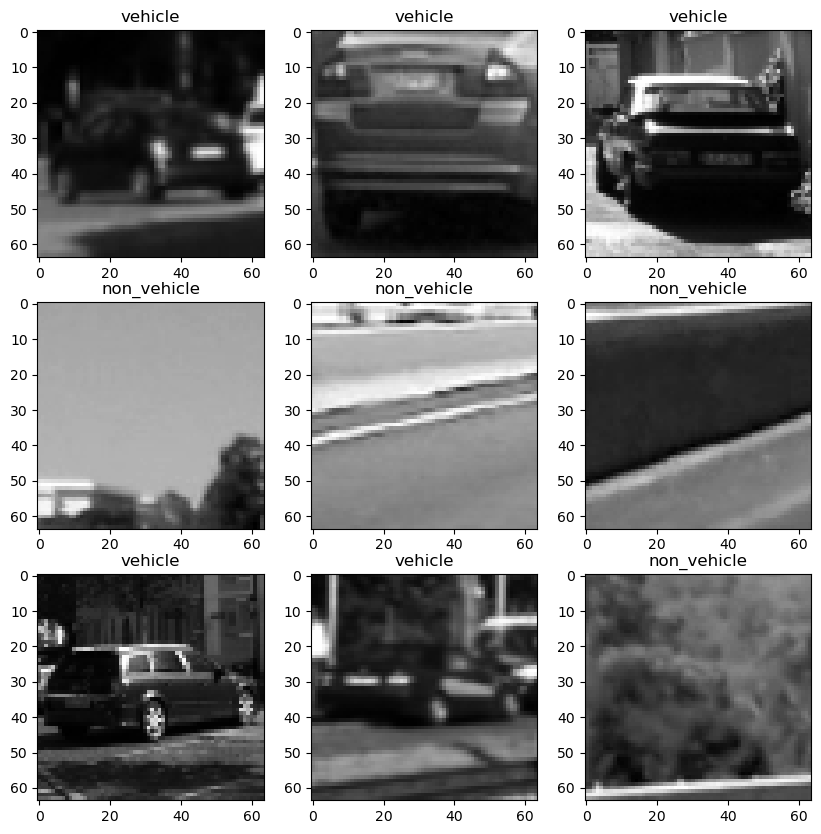

In [2]:
plt.figure(figsize = (10, 10))

# plot some images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    index = np.random.randint(0, len(images_and_labels))
    plt.imshow(images_and_labels[index][0].reshape(64, 64), cmap='gray') # remove cmap if needed
    plt.title(images_and_labels[index][1])

## 3. Data Reduction
### 3.1 Principal Component Analysis

Now, we will perform Principal Component Analysis to reduce the number of dimensions representing our data. To find the number of dimensions that can adequately represent our dataset, we first need to run Principal Component Analysis on all of the dimensions of our data (which in our case is 4096).

In [3]:
from sklearn.decomposition import PCA

# run PCA on all 4096 dimensions to find an adequate number of dimensions
pca = PCA(n_components=images_and_labels[0][0].size, svd_solver='full')
pca.fit_transform(np.array([image for image, label in images_and_labels]))

print ('First 10 Principal Components:\n', pca.components_[0:10])
print("First 10 Explained Variances:\n", pca.explained_variance_ratio_[0:10])

First 10 Principal Components:
 [[ 1.34186949e-02  1.34580896e-02  1.34594647e-02 ...  1.12682930e-02
   1.11100690e-02  1.10785930e-02]
 [-1.86257219e-02 -1.88311027e-02 -1.91064853e-02 ...  1.51564757e-02
   1.44985410e-02  1.40297602e-02]
 [ 9.60369003e-03  9.55184770e-03  9.54490933e-03 ...  2.38617066e-02
   2.34450781e-02  2.30716462e-02]
 ...
 [-2.26073441e-02 -2.36880238e-02 -2.42858826e-02 ...  2.40147494e-02
   2.43319815e-02  2.46879654e-02]
 [-1.93782612e-02 -1.96369464e-02 -2.01184813e-02 ... -1.29563449e-02
  -1.42527385e-02 -1.45502531e-02]
 [ 7.35028746e-05 -1.86638528e-04 -6.39253735e-04 ...  3.96692811e-03
   6.91418281e-03  8.49005641e-03]]
First 10 Explained Variances:
 [0.34959736 0.12346729 0.08595966 0.03621567 0.02748225 0.02383318
 0.01643278 0.01505319 0.01365261 0.01095285]


Now, we can visualize how the total explained variance relates to the number of components. By doing this, we can find an adequate number of dimensions we can use to represent our image dataset.

Need 228 Principal Components for an Explained Variance of 95%


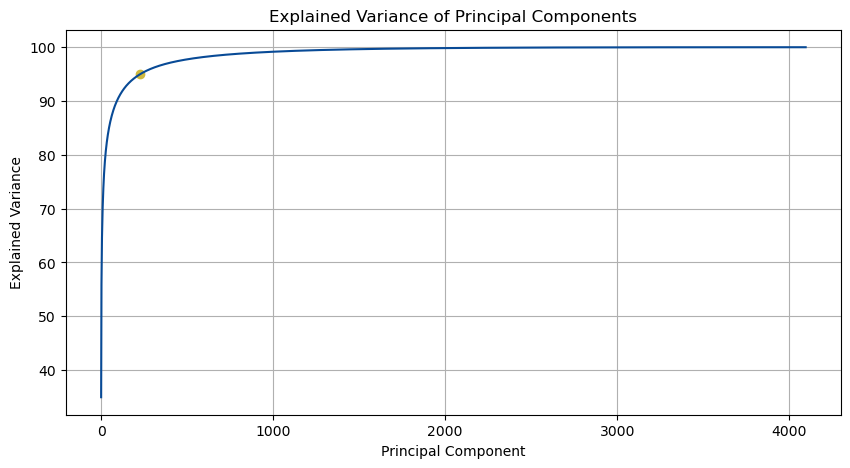

In [4]:
# function that plots the explained variance vs. number of principal components
def plot_explained_variance(pca=None, rpca=None, target_variance=None):
    plt.figure(figsize=(10, 5))
    
    if pca is not None:
        pca_explained_variance = pca.explained_variance_ratio_
        pca_cumulative_explained_variance = pca_explained_variance.cumsum()

        if target_variance is not None:
            pc_index = np.where(pca_cumulative_explained_variance >= target_variance)[0][0]
            print('Need {} Principal Components for an Explained Variance of {}%'.format(pc_index, int(target_variance * 100)))
            plt.scatter(pc_index, pca_cumulative_explained_variance[pc_index] * 100, c='#cfb93d')
            
        plt.plot(range(len(pca_explained_variance)), 
                 pca_cumulative_explained_variance * 100, 
                 color='#084a96')

    if rpca is not None:
        rpca_explained_variance = rpca.explained_variance_ratio_
        rpca_cumulative_explained_variance = rpca_explained_variance.cumsum()

        if target_variance is not None:
            pc_index = np.where(rpca_cumulative_explained_variance >= target_variance)[0][0]
            print('Need {} Principal Components for an Explained Variance of {}%'.format(pc_index, int(target_variance * 100)))
            plt.scatter(pc_index, rpca_cumulative_explained_variance[pc_index] * 100, c='black')
            
        plt.plot(range(len(rpca_explained_variance)), 
                 rpca_cumulative_explained_variance * 100, 
                 color='#964B00')

    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance of Principal Components')
    plt.grid()
    plt.show()

# plot the explained variance
plot_explained_variance(pca=pca, target_variance=0.95)

As the above graph shows, the total explained variance increases as the number of principal components increases (which we expect, as each principal component has some explained variance associated with it). Based on the graph, we decided that **228 dimensions** (or 228 principal components) are adequate to represent our image data. We chose this number as 228 dimensions have about **95%** of the total explained variance (which is a high percentage). Additionally, as seen in the graph above, 95% of the explained variance occurs around the "knee" of the graph (which is the point at which the graph begins to flatten out, and each additional principal component begins to contribute less and less explained variance). Thus, we believe that 228 dimensions are adequate to represent our dataset, as any additional dimensions will not contribute much to the explained variance.

Thus, we will run PCA on the data again with 228 n_components:

In [5]:
# run PCA and keep top 228 dimensions
pca = PCA(n_components=228, svd_solver='full')
%time pca_features = pca.fit_transform(np.array([image for image, label in images_and_labels]))

print()
print ('First 10 Principal Components:\n', pca.components_[0:10])
print("First 10 Explained Variances:\n", pca.explained_variance_ratio_[0:10])

CPU times: total: 2min 44s
Wall time: 43.9 s

First 10 Principal Components:
 [[ 1.34186949e-02  1.34580896e-02  1.34594647e-02 ...  1.12682930e-02
   1.11100690e-02  1.10785930e-02]
 [-1.86257219e-02 -1.88311027e-02 -1.91064853e-02 ...  1.51564757e-02
   1.44985410e-02  1.40297602e-02]
 [ 9.60369003e-03  9.55184770e-03  9.54490933e-03 ...  2.38617066e-02
   2.34450781e-02  2.30716462e-02]
 ...
 [-2.26073441e-02 -2.36880238e-02 -2.42858826e-02 ...  2.40147494e-02
   2.43319815e-02  2.46879654e-02]
 [-1.93782612e-02 -1.96369464e-02 -2.01184813e-02 ... -1.29563449e-02
  -1.42527385e-02 -1.45502531e-02]
 [ 7.35028746e-05 -1.86638528e-04 -6.39253735e-04 ...  3.96692811e-03
   6.91418281e-03  8.49005641e-03]]
First 10 Explained Variances:
 [0.34959736 0.12346729 0.08595966 0.03621567 0.02748225 0.02383318
 0.01643278 0.01505319 0.01365261 0.01095285]


### 3.2 Randomized Principal Component Analysis

Now that we know an adequate number of dimensions to represent our data is 228, we can also use Randomized Principal Component Analysis to linearly reduce the number of dimensions of our data.

In [6]:
rpca = PCA(n_components=228, svd_solver='randomized')
%time rpca_features = rpca.fit_transform(np.array([image for image, label in images_and_labels]))

print()
print ('First 10 Principal Components:\n', rpca.components_[0:10])
print("First 10 Explained Variances:", rpca.explained_variance_ratio_[0:10])

CPU times: total: 15.5 s
Wall time: 5.36 s

First 10 Principal Components:
 [[ 1.34186949e-02  1.34580896e-02  1.34594647e-02 ...  1.12682930e-02
   1.11100690e-02  1.10785930e-02]
 [-1.86257219e-02 -1.88311027e-02 -1.91064853e-02 ...  1.51564757e-02
   1.44985410e-02  1.40297602e-02]
 [ 9.60369003e-03  9.55184770e-03  9.54490933e-03 ...  2.38617066e-02
   2.34450781e-02  2.30716462e-02]
 ...
 [-2.26073441e-02 -2.36880238e-02 -2.42858826e-02 ...  2.40147494e-02
   2.43319815e-02  2.46879654e-02]
 [-1.93782612e-02 -1.96369464e-02 -2.01184813e-02 ... -1.29563449e-02
  -1.42527385e-02 -1.45502531e-02]
 [ 7.35028746e-05 -1.86638528e-04 -6.39253735e-04 ...  3.96692811e-03
   6.91418281e-03  8.49005641e-03]]
First 10 Explained Variances: [0.34959736 0.12346729 0.08595966 0.03621567 0.02748225 0.02383318
 0.01643278 0.01505319 0.01365261 0.01095285]


Now we can plot the explained variance and see if 228 dimensions are still adequate to represent the data.

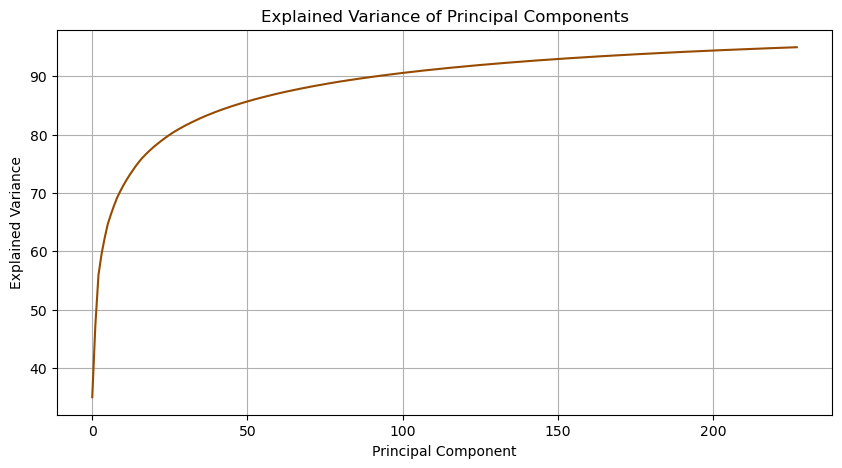

In [7]:
plot_explained_variance(rpca=rpca)

As the plot above shows, 228 components are sufficient to represent the data, as even when calculated using Randomized PCA, the total explained variance is still around 95%. Additionally, the plot is beginning to flatten out after 228 components, so any additional components will not add much explained variance.

### 3.3 PCA vs. Randomized PCA

Now that we've performed both PCA and Randomized PCA on our dataset, we can compare the results to see if one method is better than the other. We can first plot the explained variances of each method to see how similiar they are:

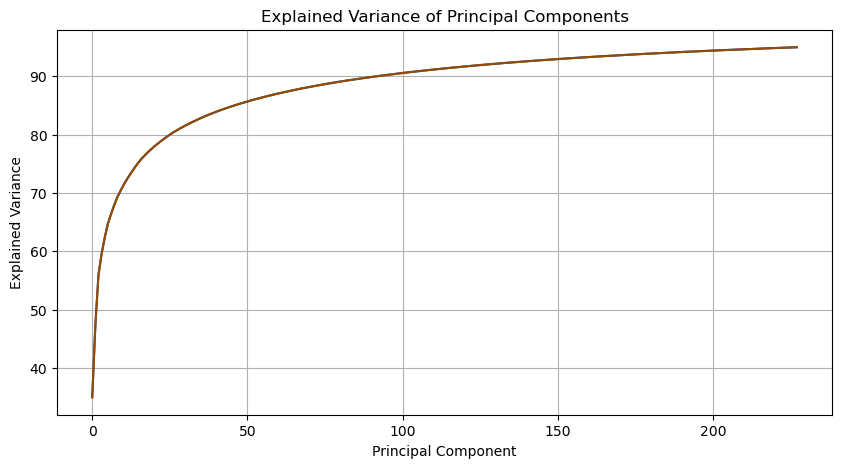

In [8]:
plot_explained_variance(pca=pca, rpca=rpca)

As the above plot shows, the results from PCA and Randomized PCA are so similiar that you cannot even see the PCA line on the above graph (as the Randomized PCA line is right on top of it). We can further confirm that their results are extremely similiar by looking at the exact values of their explained variances:

In [9]:
for pca_value, rpca_value in zip(pca.explained_variance_ratio_[0:10], rpca.explained_variance_ratio_[0:10]):
    print(' PCA:', pca_value)
    print('RPCA:', rpca_value)
    print()

 PCA: 0.34959735886210147
RPCA: 0.34959735886210036

 PCA: 0.12346729430885969
RPCA: 0.12346729430885962

 PCA: 0.0859596568741012
RPCA: 0.08595965687410126

 PCA: 0.03621566936438243
RPCA: 0.03621566936438222

 PCA: 0.02748224897001417
RPCA: 0.027482248970014146

 PCA: 0.02383318036763586
RPCA: 0.02383318036763585

 PCA: 0.016432782872118988
RPCA: 0.016432782872118988

 PCA: 0.015053187608608815
RPCA: 0.015053187608608808

 PCA: 0.013652608527407172
RPCA: 0.013652608527407158

 PCA: 0.010952851373672409
RPCA: 0.010952851373672442



As shown above, the explained variance for each principal component is almost the exact same whether it was calculated using PCA or Randomized PCA.

However, there is one big difference between PCA and Randomized PCA: how long it takes for each method to compute its values. As shown earlier, PCA took **43.9** seconds to run, while Randomized PCA took only **5.36** seconds (which was approximately 8 times faster than PCA). This difference in computational speed is fairly significant, considering that PCA and Randomized PCA produce basically the same results. Thus, we prefer Randomized PCA over PCA due to its faster performance time.

### 3.4 Feature Extraction using DAISY

To perform feature extraction on our data, we decided to use the DAISY method.

In [10]:
from skimage.feature import daisy
from sklearn.metrics.pairwise import pairwise_distances
import copy

def use_daisy(img, dim):
    features = daisy(img.reshape((dim,dim)), step=10, radius=15, rings=2, histograms=8, orientations=4)
    return features.reshape((-1))

# For every image, use daisy to extract features
daisy_features = np.apply_along_axis(use_daisy, 1, np.array([image for image, label in images_and_labels]), 64)
print('Daisy Features Shape:', daisy_features.shape)

distance_matrix = pairwise_distances(daisy_features)

Daisy Features Shape: (17760, 1088)


(-0.5, 63.5, 63.5, -0.5)

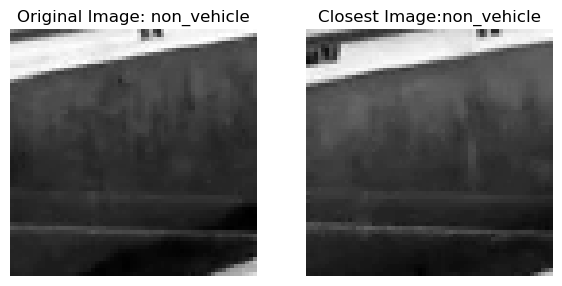

In [12]:
# Find closest image to current image
import sys

index1 = np.random.randint(0, len(images_and_labels))
distances = copy.deepcopy(distance_matrix[index1,:])
distances[index1] = sys.maxsize
index2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow(images_and_labels[index1][0].reshape((64,64)), cmap='gray')
plt.title("Original Image: " + images_and_labels[index1][1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(images_and_labels[index2][0].reshape((64,64)), cmap='gray')
plt.title("Closest Image:" + images_and_labels[index2][1])
plt.axis('off')

As seen in the above comparison, the DAISY method was able to find a picture of the same class ("non-vehicle") that also has very similar features to the original image (based on human intuition). Thus, it initially appears that the DAISY feature extraction method is a valid prediction method for this dataset; we will quantitatively analyze its validity as a prediction method in the next section.

### 3.5 DAISY Feature Extraction Analysis

So how can we know for sure whether DAISY is a valid prediction method for our data? We decided to build a K nearest neighbor classifier to see how accurate it was at classifying images as either "vehicle" or "non-vehicle".

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = [label for image, label in images_and_labels]

knn_RPCA = KNeighborsClassifier(n_neighbors=1)
knn_DAISY = KNeighborsClassifier(n_neighbors=1)

RPCA_train, RPCA_test, DAISY_train, DAISY_test, y_train, y_test = train_test_split(rpca_features, daisy_features, y, test_size=0.2)

# Fit and predict using RPCA features
knn_RPCA.fit(RPCA_train, y_train)
RPCA_accuracy = accuracy_score(knn_RPCA.predict(RPCA_test), y_test)

# Fit and predict using DAISY features
knn_DAISY.fit(DAISY_train, y_train)
DAISY_accuracy = accuracy_score(knn_DAISY.predict(DAISY_test), y_test)

print('RPCA Accuracy: {:.2f}%'.format(RPCA_accuracy * 100))
print('DAISY Accuracy: {:.2f}%'.format(DAISY_accuracy * 100))

RPCA Accuracy: 94.62%
DAISY Accuracy: 96.79%


As seen above, the DAISY method was **96.79%** accurate at determining the class of a given image, which was about 2% better than Randomized PCA. This accuracy is very high, thus indicating that DAISY is a valid prediction method for our data. However, it is worth noting that we would likely want a higher prediction accuracy for a prediction method that is used in self-driving cars (as a 3% error rate is too high when the consequences of getting a prediction wrong could result in someone's death). 

## 4. Feature Extraction Using DAISY Key Point Matching

### 4.1 Overview of DAISY Key Point Matching

An important part of feature extraction is determining an image's feature descriptions; to do this, we can use a feature descriptor algorithm. Feature descriptors take an image as input and output feature descriptions (or feature vectors), which encode points of interest in an image as a string of numbers often referred to as a "numerical fingerprint". DAISY, which we used earlier, is a feature descriptor that utilizes gradient oriented histograms, enabling it to quickly extract dense features. This is particularly useful in "bag-of-features" image representations. It can combine local image features and keypoints to determine corresponding points between images. In "[Fast Rotation-Invariant DAISY Descriptor for Image Keypoint Matching](https://ieeexplore.ieee.org/document/5693839)", the process and general background of DAISY keypoint matching is explained. Below is a brief overview of the process:

The process of determing these corresponding points is usually divided into three main steps:
1. Extract keypoints in the images in their own distinctive way (such as corners).
2. Represent pixels within a certain radius of a keypoint as a vector.
3. Match these description vectors between images according to similarity (distance between vectors). Euclidean or Mahalanobis distance is commonly used.

Using this basic process we can break down each image into its own set of daisy descriptors, which will then be used to match keypoints between images, and the best match will be saved. This will be done for each pair of images, and the number of matches will be recorded; we can then use the number of matches to determine how similar each pair of images are.

DAISY Descriptors (P,Q,R):  (4, 4, 68)


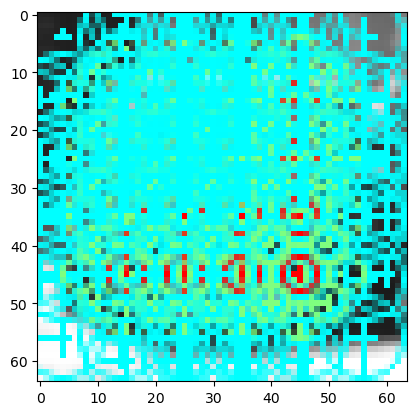

In [14]:
# Take 2000 images from the first half of the dataset and 2000 from the second half
# to ensure there are vehicles and non-vehicles in the sample
images_and_labels_2 = images_and_labels[:2000] + images_and_labels[10000:12000]

# Example on one image
features, image_description = daisy(images_and_labels_2[0][0].reshape((64,64)), step=10, radius=15, rings=2, histograms=8, 
                                    orientations=4, visualize=True)

plt.imshow(image_description)

print('DAISY Descriptors (P,Q,R): ', features.shape)

The above image shows what the DAISY descriptors look like; these descriptors will not be visualized in the coming analysis.

In [15]:
def use_daisy(img, dim):
    features = daisy(img.reshape((dim,dim)), step=10, radius=15, rings=2, histograms=8, orientations=4)
    new_shape = features.shape
    return features.reshape((new_shape[0]*new_shape[1], new_shape[2]))

# Apply daisy to all images
d_images_and_labels = [tuple((use_daisy(image, 64), label)) for image, label in images_and_labels_2]

print('DAISY features shape', d_images_and_labels[0][0].shape)

DAISY features shape (16, 68)


In [16]:
from skimage.feature import match_descriptors

matches_found = []

# Find matches between every pair of images, and keep the best match for each pair
for i in range(len(d_images_and_labels)):
    best_percentage = 0
    best_match_index = 0

    best_num_matches = -sys.maxsize
    for j in range(i + 1, len(d_images_and_labels)):
        if i != j:
            matches = match_descriptors(d_images_and_labels[i][0], d_images_and_labels[j][0], cross_check=True, max_ratio=0.8)
            similarity_percentage = 100*matches.shape[0]/d_images_and_labels[i][0].shape[0]
            if similarity_percentage > best_percentage:
                best_percentage = similarity_percentage
                best_match_index = j
                best_num_matches = matches.shape[0]
    matches_found.append(tuple((best_num_matches, i, best_match_index)))

As seen above, following the matching of keypoints between images, the number of matches recorded is used as a metric to determine similarity between pairs of images. To quantify this similarity, a percentage is computed by dividing the number of matches by the total number of keypoints in the first image. This percentage serves as a reliable indicator of the degree of similarity between image pairs.

Now we can plot some of the images with their closest matches. We'll start by looking at 5 pairs of "vehicle" images:

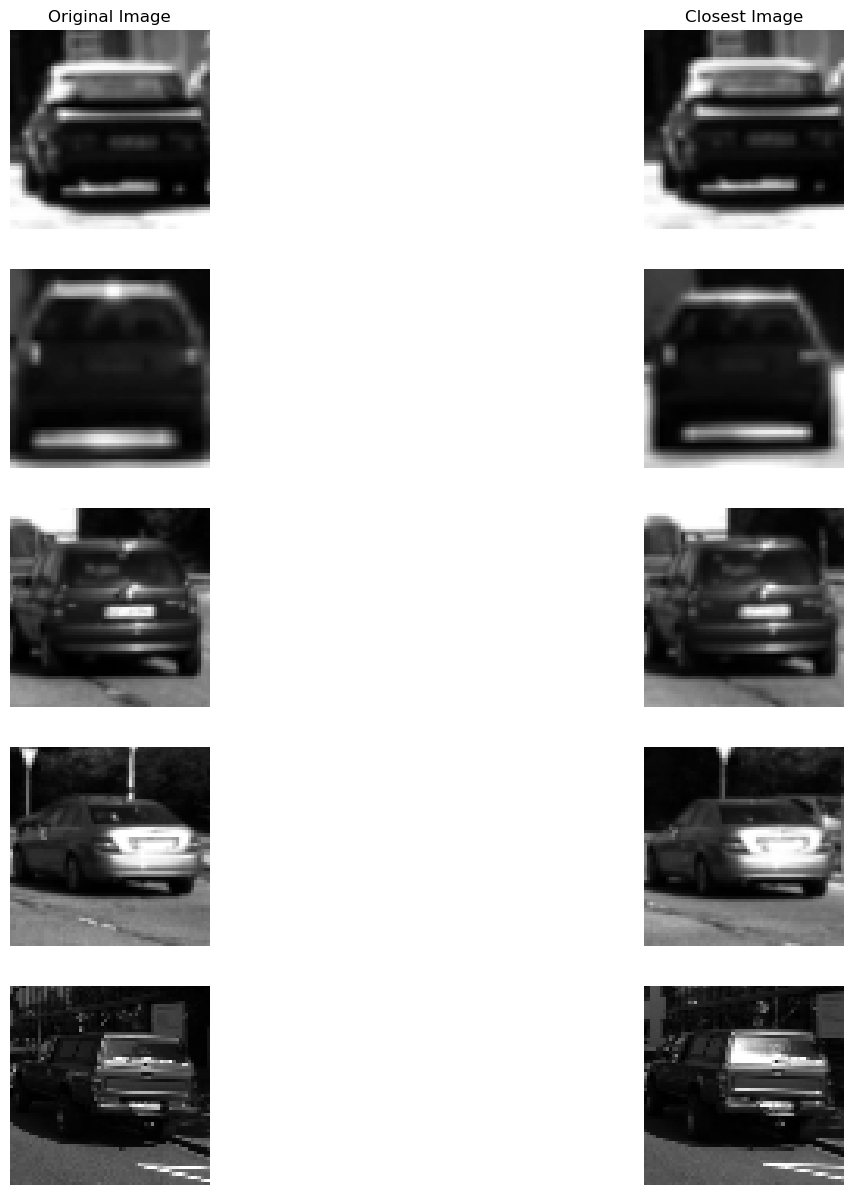

In [17]:
# Plotting 5 matches (of vehicles)
plt.figure(figsize=(15, 15))
for i in range(5):
    # Plotting the original image (left) and the closest match (right)
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(images_and_labels_2[matches_found[i][1]][0].reshape((64,64)), cmap='gray')
    plt.axis('off')
    plt.title('Original Image') if i == 0 else None
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(images_and_labels_2[matches_found[i][2]][0].reshape((64,64)), cmap='gray')
    plt.title('Closest Image') if i == 0 else None
    plt.axis('off')

The above plot showcases images extracted from the first half of the dataset, which features vehicle images. These images are shown with their closest counterparts determined by DAISY keypoint matching. In most cases, as seen in the displayed samples, the closest matching image belongs to the same vehicle class, and it is also usually the same image but taken with a slightly different angle or lighting. This indicates that DAISY keypoint matching is an effective way to determine image similarity.

Now we can look at 5 pairs of "non-vehicle" images:

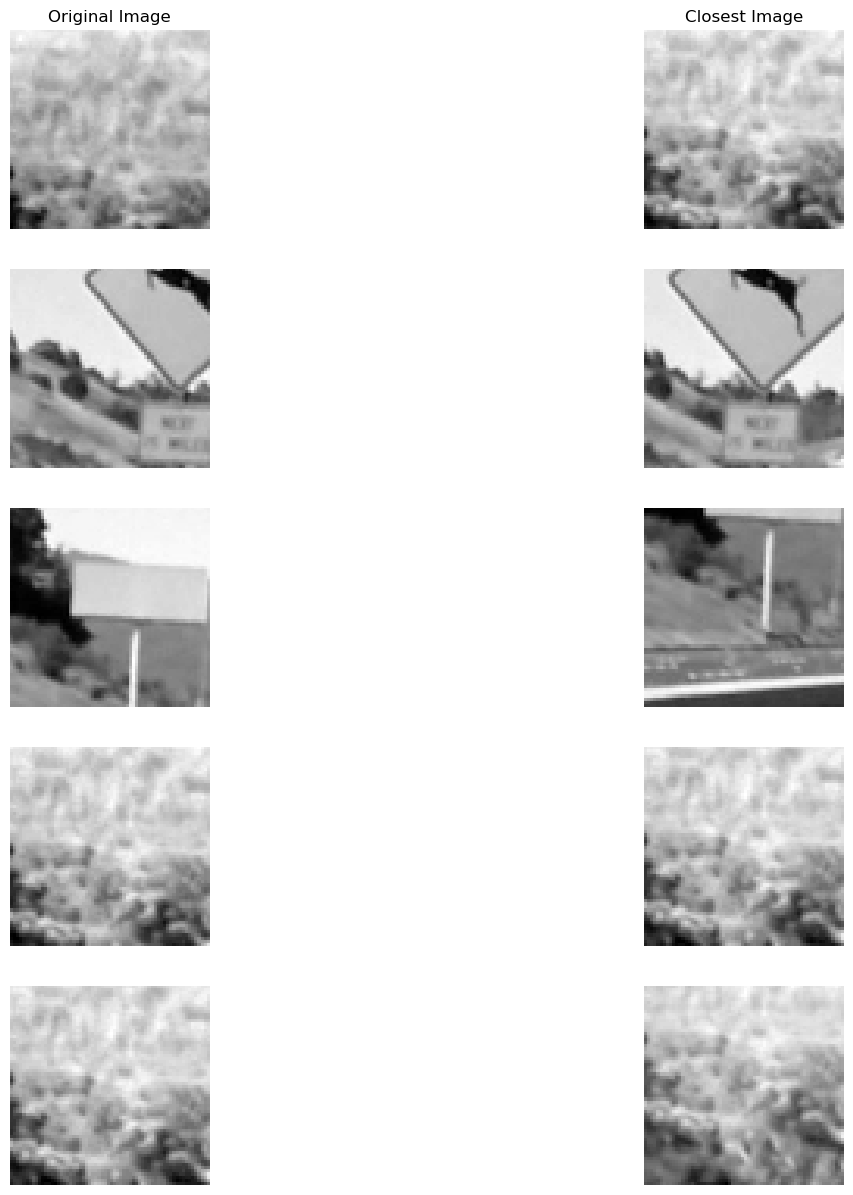

In [18]:
# Plotting 5 matches (of non-vehicles)
plt.figure(figsize=(15, 15))
for i in range(5):
    # Plotting the original image (left) and the closest match (right)
    plt.subplot(5, 2, 2*i + 1)
    # i + 2500 to pick images from latter half of dataset
    plt.imshow(images_and_labels_2[matches_found[i+2100][1]][0].reshape((64,64)), cmap='gray')
    plt.axis('off')
    plt.title('Original Image') if i == 0 else None
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(images_and_labels_2[matches_found[i+2100][2]][0].reshape((64,64)), cmap='gray')
    plt.title('Closest Image') if i == 0 else None
    plt.axis('off')


In this plot the images showcased are extracted from the latter half of the dataset, which features "non-vehicle" images. These images are also shown with their closest counterparts, as determined by DAISY keypoint matching. For each image, the closest matching image belongs to the same "non-vehicle" class, and it is also usually the same image but taken with a slightly different angle or lighting (such as the two images of the deer crossing sign that are at slightly diferent angles). This further indicates that DAISY keypoint matching is an effective way to determine image similarity.

Finally, we can look at how accurate DAISY keypoint matching is at classifying an image as either "vehicle" or "non-vehicle".

In [19]:
# Using KNNClassifier with keypoint matches as features
y = [label for image, label in images_and_labels_2]

knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(matches_found, y, test_size=0.2)

knn.fit(X_train, y_train)
accuracy = accuracy_score(knn.predict(X_test), y_test)

print('DAISY Keypoint Matching Accuracy: {:.2f}%'.format(accuracy * 100))

DAISY Keypoint Matching Accuracy: 99.75%


As shown above, the DAISY keypoint matching has an accuracy of **99.75%**, which is extremely high. Additionally, it has a higher accuracy than both Randomized PCA (94.62%) and the DAISY method that doesn't use key point matching (96.79%). Thus, we can conclusively say that DAISY keypoint matching is an effective way to perform feature extraction on images in order to predict a given image's class; furthermore, it is the best method that we have examined in this report.

Due to the DAISY keypoint matching's high accuracy of 99.75%, we believe this would be a viable method to include in self-driving cars. Nevertheless, this accuracy could still be improved upon if the model was trained upon even more data.